# Effets de la sensibilité et de la variabilité de la vitesse du moteur

On souhaite voir les effets indésirables dus a la variabilité de la vitesse du moteur et de l'intensité de la source lumineuse.
Commençons par importer les fonctions que nous allons utiliser.

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
from Spectroscopy.Utilities import *

On va maintenant regarder l'effet de la variabilité de l'intensité de la source de lumière. Pour cela on va comparer deux mesures prises avec sensibilités 0 et 3 sur des durées identiques.

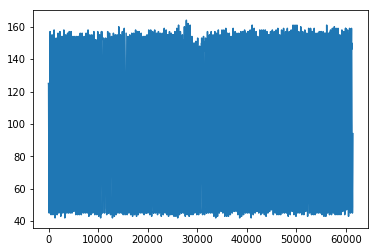

In [60]:
TS0,IS0=readfile("Data/61s_S0.TXT")
plt.plot(TS0,IS0)

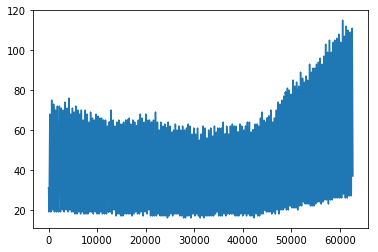

In [61]:
TS3,IS3=readfile("Data/63s_S3.TXT")
plt.plot(TS3,IS3)

On va désormais calculer la vitesse de rotation en utilisant la mesure a sensibilité 0. On va calculer non pas la position des pics mais la position des croisements de 0. On peut les détérminer avec une précision meilleure qui se débarasse un peu de l'effet de l'échantillonage.

In [62]:
T_ref,I_ref=readfile("Data/laser_ref.TXT")
v=speed_by_zeros(T_ref,I_ref)
print("La vitesse est: "+str(v)+" m/s")

La vitesse est: 8.41053156258e-07 m/s


On peut alors representer la difference créee par la variabilité de l'intensité de la source. On va plotter le spectre dans le domaine visible pour les deux sensibilités différentes.

(1e-07, 1e-06)

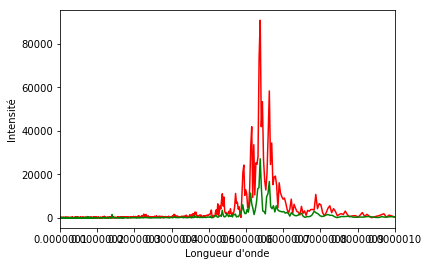

In [63]:
LambdaS0,SpecS0=spectrum(TS0,IS0,v)
LambdaS3,SpecS3=spectrum(TS3,IS3,v)
fig, ax = plt.subplots()
plt.plot(LambdaS0,SpecS0,color="red")
plt.plot(LambdaS3,SpecS3,color="green")
plt.xlabel("Longueur d'onde")
plt.ylabel("Intensité")
plt.xlim(100e-9,1e-6)



Regardons désormais a quoi ressemble le spectre des lampes a mercure et sodium avec leurs raies correspondantes.

(4e-07, 8e-07)

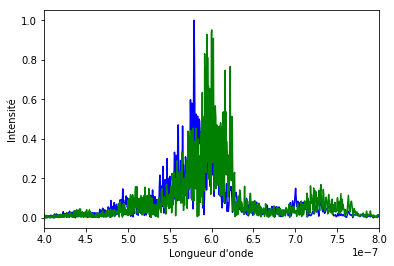

In [64]:
T_mercure,I_mercure=readfile("Data/mercure.TXT")
T_sodium,I_sodium=readfile("Data/sodium_3.TXT")
LambdaM,SpecM=spectrum(T_mercure,I_mercure,v)
LambdaS,SpecS=spectrum(T_sodium,I_sodium,v)
fig, ax = plt.subplots()
plt.plot(LambdaM,SpecM/max(SpecM),color="blue")
plt.plot(LambdaS,SpecS/max(SpecS),color="green")
plt.xlabel("Longueur d'onde")
plt.ylabel("Intensité")
plt.xlim(400e-9,800e-9)

Sans surprises, on ne peut rien conclure de ces spectres sauf peut etre la valeur approximative des deux doublets.

In [65]:
LambdaSodium=LambdaS[detect_peaks(SpecS/max(SpecS),mph=0.9,mpd=100)[0]]
LambdaMercure=LambdaM[detect_peaks(SpecM/max(SpecM),mph=0.9,mpd=100)[0]]
print("Pic d'émission Sodium: "+str(LambdaSodium*10**9)+" nm")
print("Pic d'émission Mercure: "+str(LambdaMercure*10**9)+" nm")

Pic d'émission Sodium: 600.100812722 nm
Pic d'émission Mercure: 578.983819837 nm


Avec une méthode légerement différente, en detectant les passages en 0, on trouve:

In [66]:
DistanceM=np.array([i*v/1000 for i in points_of_zero(np.array(I_mercure)-np.mean(I_mercure),10)])
NumberM=np.arange(len(DistanceM))
zM=np.polyfit(NumberM/4, DistanceM, 1, full=True)[0]
LambdaMercure_zer=zM[0]
DistanceS=np.array([i*v/1000 for i in points_of_zero(np.array(I_sodium)-np.mean(I_sodium),10)])
NumberS=np.arange(len(DistanceS))
zS=np.polyfit(NumberS/4, DistanceS, 1, full=True)[0]
LambdaSodium_zer=zS[0]
print("Pic d'émission Sodium: "+str(LambdaSodium_zer*10**9)+" nm")
print("Pic d'émission Mercure: "+str(LambdaMercure_zer*10**9)+" nm")

Pic d'émission Sodium: 59.5102465847 nm
Pic d'émission Mercure: 56.6238518247 nm


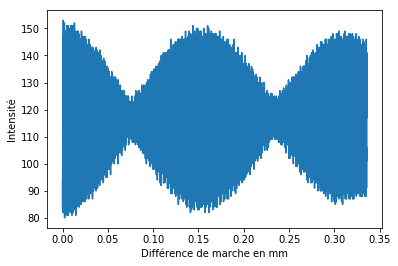

In [67]:
plt.plot(np.array(T_mercure)*v*2,I_mercure)
plt.xlabel("Différence de marche en mm")
plt.ylabel("Intensité")

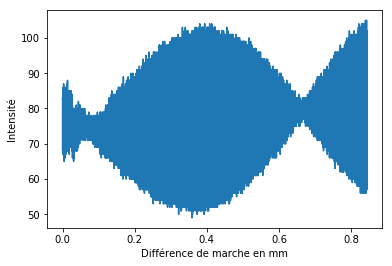

In [68]:
plt.plot(np.array(T_sodium)*v*2,I_sodium)
plt.xlabel("Différence de marche en mm")
plt.ylabel("Intensité")

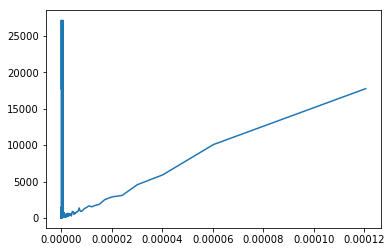

In [69]:
a,b=spectrum_from_file("Data/63s_S3.TXT",v)
plt.plot(a,b)